In [2]:
import os
import sys
os.environ["UW_ENABLE_TIMING"] = "1"
import underworld as uw
from underworld import function as fn
from underworld.scaling import units as u
from underworld.scaling import dimensionalise as dm, non_dimensionalise as nd
import glucifer
import numpy as np

In [3]:
#
# Scaling and Units
#
# Dimentional Parameters
modelHeight = 2891 * u.kilometer
earthRadius = 6371 * u.kilometer
modelCartAspect=4
ThetaRAD=np.rad2deg((modelHeight*modelCartAspect)/earthRadius)

# plateHeight = 120. * u.kilometer
refDensity = 3200.0 * u.kilogram / u.meter ** 3
deltaRhoMax = 80.0 * u.kilogram / u.meter ** 3
gravity = 9.8 * u.metre / u.second ** 2
# 1.57e20 * u.pascal * u.second 5.e20 * u.pascal * u.second
refViscosity = 5.0e20 * u.pascal * u.second
bodyForce = deltaRhoMax * gravity

# scaling coefficients
K_eta = refViscosity
KL = modelHeight
K_tau = bodyForce * modelHeight
K_v = K_tau * modelHeight / K_eta
# Kt = KL/K_v
Kt = K_eta / K_tau
KM = K_tau * modelHeight * Kt ** 2

scaling_coefficients = uw.scaling.get_coefficients()

scaling_coefficients["[length]"] = KL.to_base_units()
# scaling_coefficients["[temperature]"] = KT.to_base_units()
scaling_coefficients["[time]"] = Kt.to_base_units()
scaling_coefficients["[mass]"] = KM.to_base_units()

In [4]:
mesh = uw.mesh.FeMesh_Annulus(
        elementRes = (32,64),
        radialLengths = (nd(earthRadius-modelHeight),nd(earthRadius)),
        angularExtent=((180-ThetaRAD.magnitude)/2,90+ThetaRAD.magnitude/2)
)
        

velocityField       = mesh.add_variable( nodeDofCount=2 )
pressureField       = mesh.subMesh.add_variable( nodeDofCount=1 )
lower = mesh.specialSets["MinI_VertexSet"]
upper = mesh.specialSets["MaxI_VertexSet"]
swarm = uw.swarm.Swarm(mesh, particleEscape=True)
materialVariable=swarm.add_variable(count=1,dataType="int")
layout = uw.swarm.layouts.PerCellSpaceFillerLayout(swarm, particlesPerCell=10)
swarm.populate_using_layout(layout)
advector = uw.systems.SwarmAdvector(velocityField=velocityField, swarm=swarm)


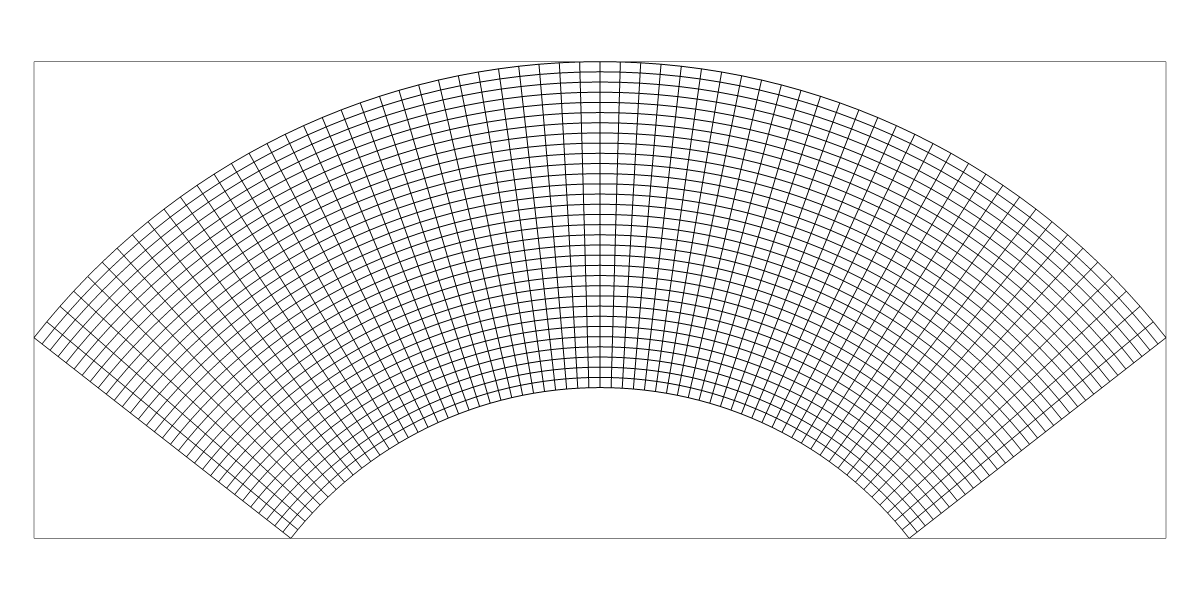

In [5]:
store=None
fig = glucifer.Figure(store=store,figsize=(1200,600))
# fig.append( glucifer.objects.Mesh( mesh ,nodeNumbers=True))
fig.append( glucifer.objects.Mesh( mesh ))
# fig.append( glucifer.objects.Points( swarm,pointsize=4))
fig.show()

In [6]:
# vField.data[cEdge.data] = (0.,0.,0.)
# vBC = uw.conditions.RotatedDirichletCondition( variable=vField,
#                                                    indexSetsPerDof=(inner+outer,E+W+cEdge,NS0+cEdge),
#                                                    basis_vectors = (mesh._e1, mesh._e2, mesh._e3) )

In [79]:


def pol2cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return(x, y)
radialFn = fn.math.sqrt(fn.math.dot(fn.coord(), fn.coord()))
thetaFn = fn.math.atan2(fn.coord()[1], fn.coord()[0])

In [36]:

# for index,coord in enumerate(swarm.data):
#     r,theta=cart2pol(coord[0],coord[1])
#     if r>nd(earthRadius-660.*u.kilometer):
#         materialVariable.data[index]=1
materialVariable.data[:]=1
materialVariable.data[mesh.unit_heightFn.evaluate(swarm.data)>nd(modelHeight-660.*u.kilometer)]=0


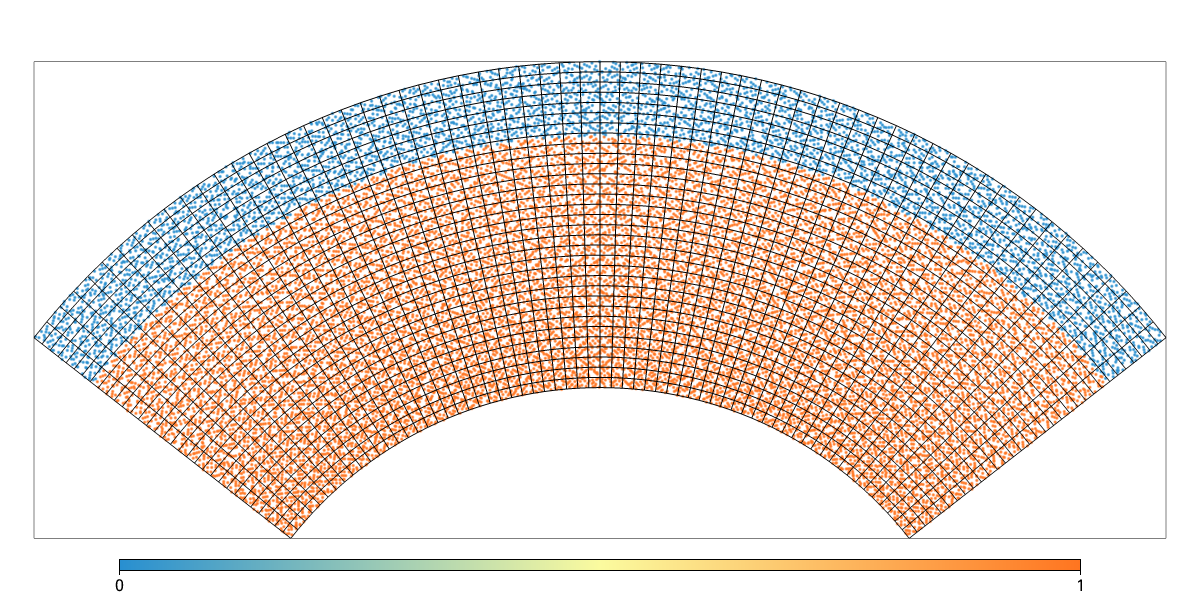

In [37]:
store=None
fig = glucifer.Figure(store=store,figsize=(1200,600))
fig.append( glucifer.objects.Mesh( mesh))
fig.append( glucifer.objects.Points( swarm,materialVariable,pointsize=4))

fig.show()

In [22]:
tv=np.array(pol2cart(nd(earthRadius),np.rad2deg(theta)))

In [23]:
mesh.unitvec_r_Fn.evaluate([tv[0],tv[1]])

array([[-0.99971084,  0.02404638]])

In [ ]:
np.array(pol2cart(nd(earthRadius-660.*u.kilometer),np.rad2deg(theta)))


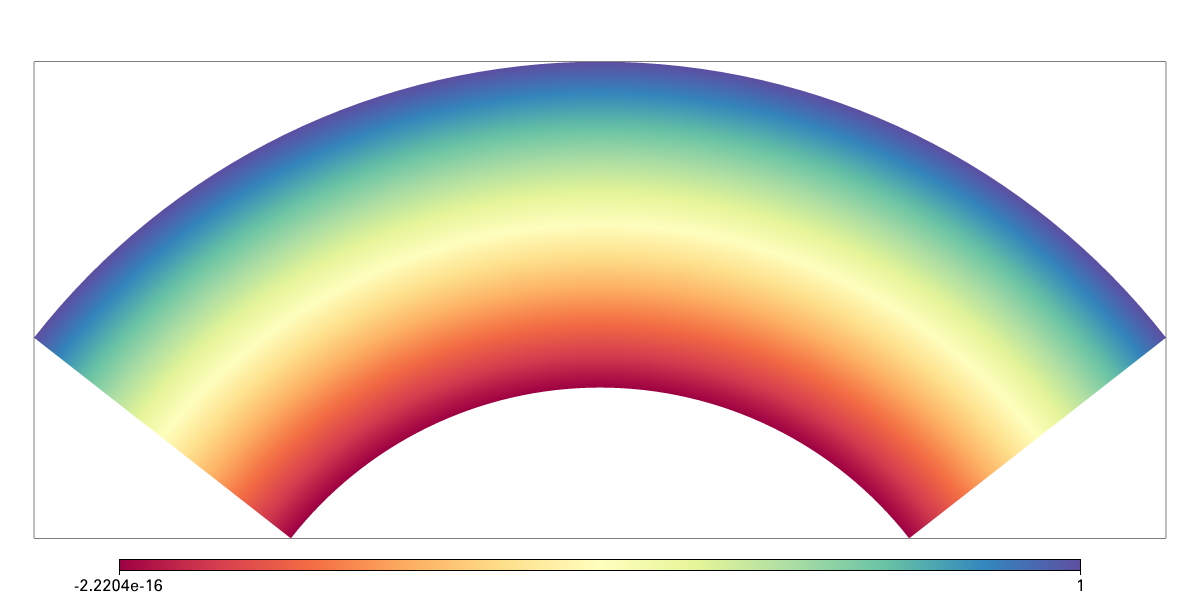

In [39]:
fig=glucifer.Figure(store=store,figsize=(1200,600))
fig.Surface( mesh,mesh.unit_heightFn,colours='spectral')
fig.show()


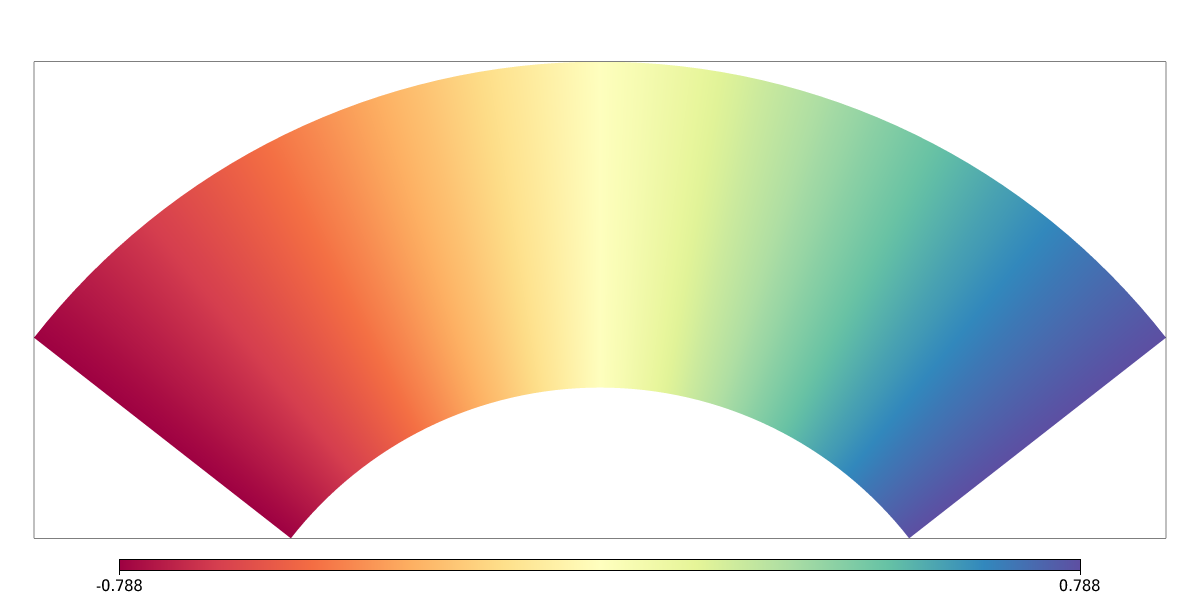

In [42]:
fig=glucifer.Figure(store=store,figsize=(1200,600))
fig.Surface( mesh,mesh.unitvec_r_Fn[0],colours='spectral')
fig.show()


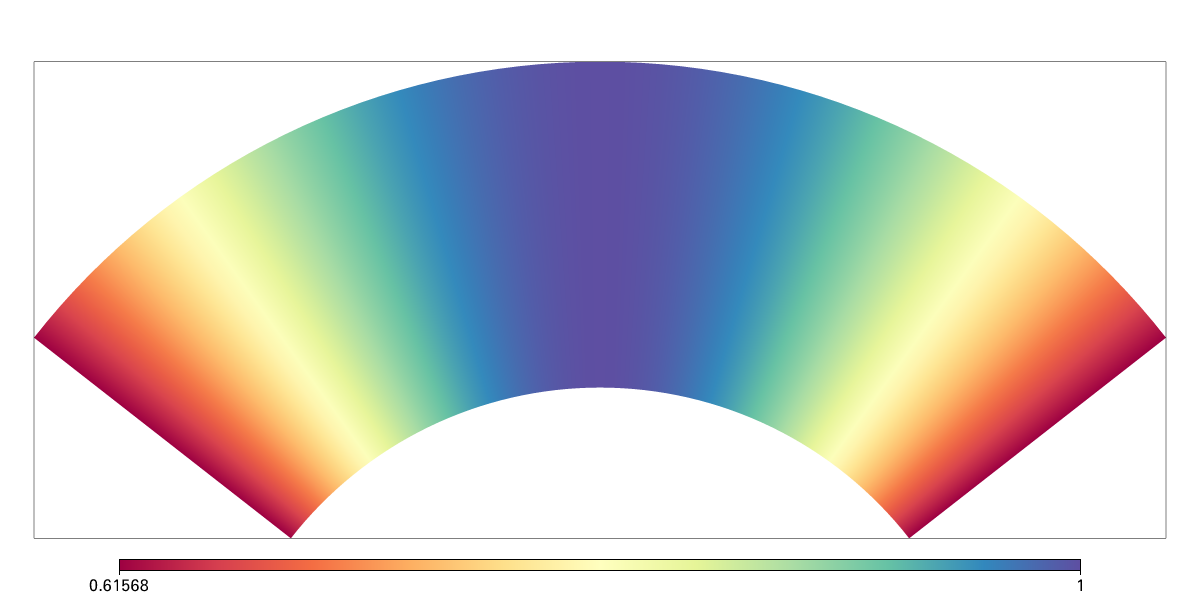

In [43]:
fig=glucifer.Figure(store=store,figsize=(1200,600))
fig.Surface( mesh,mesh.unitvec_r_Fn[1],colours='spectral')
fig.show()


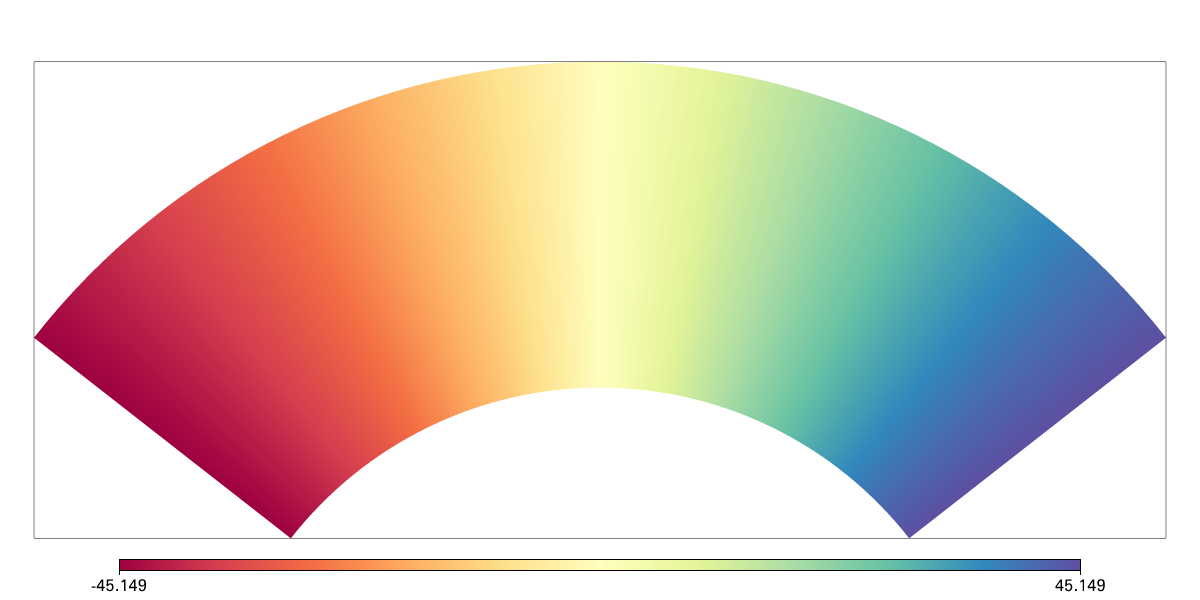

In [48]:
fig=glucifer.Figure(store=store,figsize=(1200,600))
fig.Surface( mesh,mesh.unitvec_theta_Fn[1]*180./np.pi,colours='spectral')
fig.show()


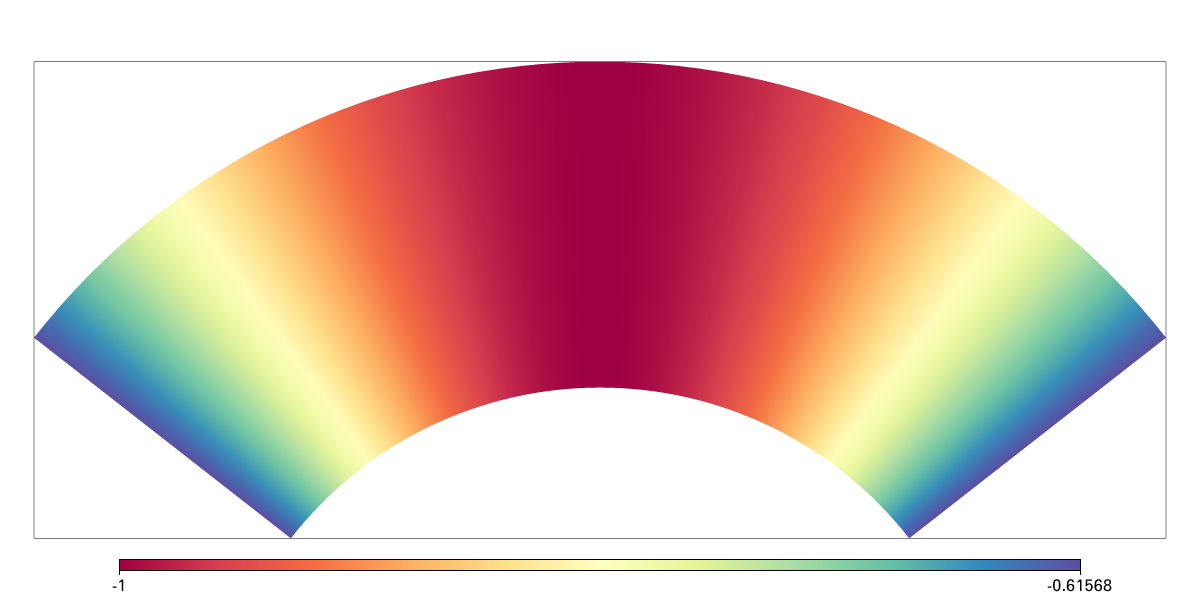

In [50]:
fig=glucifer.Figure(store=store,figsize=(1200,600))
fig.Surface( mesh,mesh.unitvec_theta_Fn[0],colours='spectral')
fig.show()


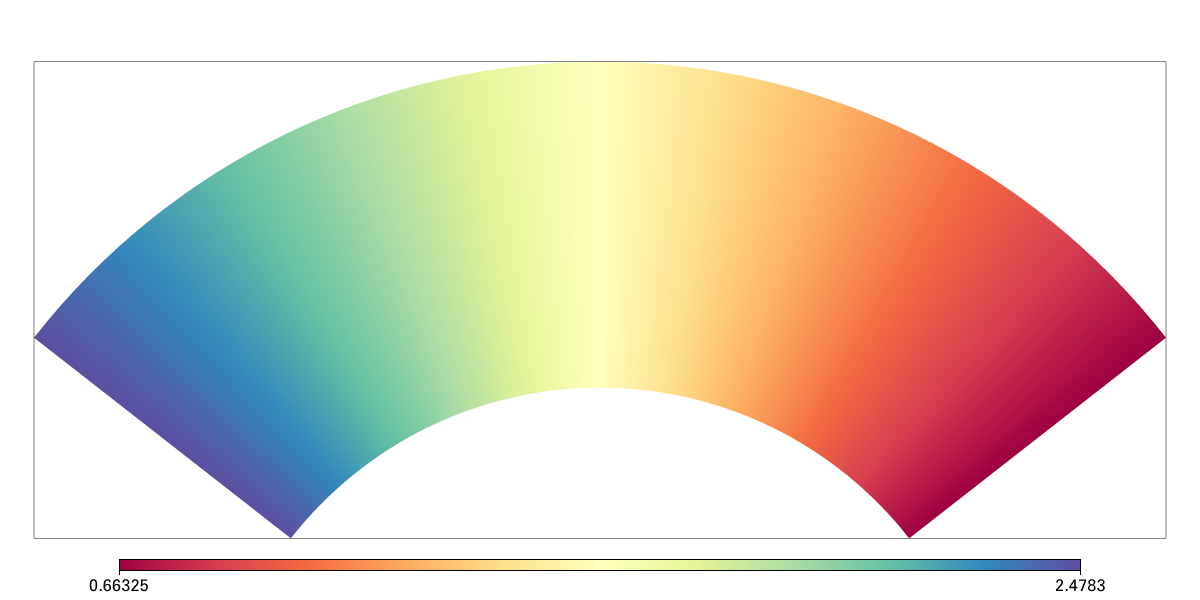

In [78]:
fig=glucifer.Figure(store=store,figsize=(1200,600))
fig.Surface(mesh,mesh.h1_coord_Fn,colours='spectral')
fig.show()



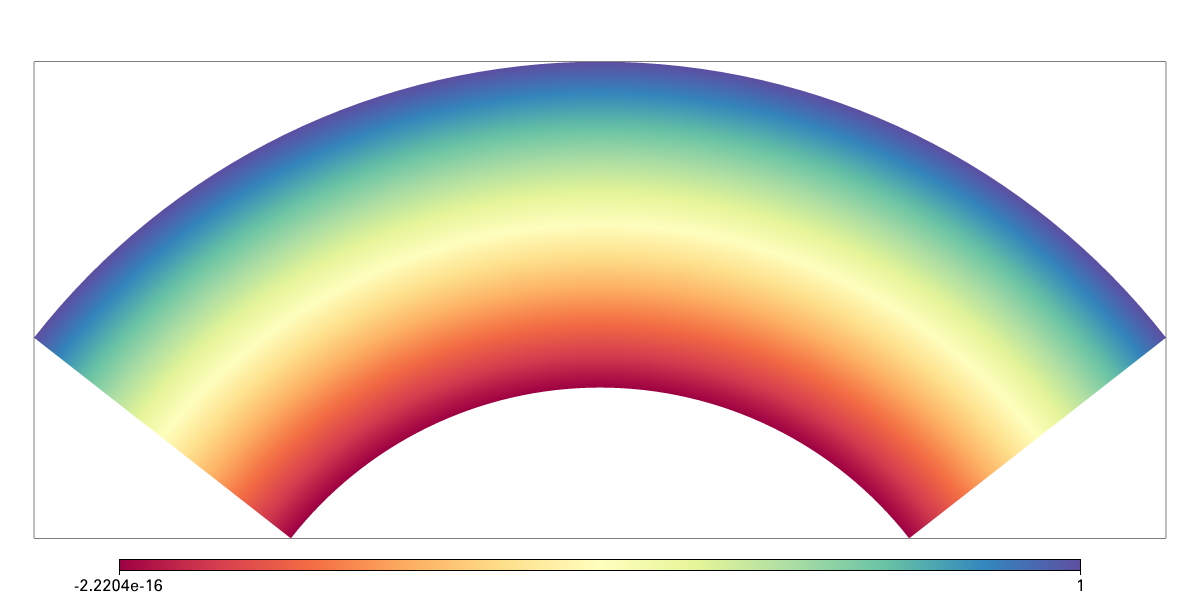

In [73]:
fig=glucifer.Figure(store=store,figsize=(1200,600))
fig.Surface(mesh,mesh.unit_heightFn,colours='spectral')
fig.show()


In [60]:
mesh.fn_radial

In [ ]:
mesh.unitvec_r_Fn.evaluate([1.,0.])

In [ ]:
mesh.unit_heightFn?

In [ ]:
mesh.unitvec_theta_Fn

In [38]:
mesh.unitvec_theta_Fn.evaluate([tv[0],tv[1]])

array([[-0.02404638, -0.99971084]])

In [75]:
uw.function.shape.Polygon

underworld.function.shape.Polygon

In [80]:
modelHeight = 2891 * u.kilometer
earthRadius = 6371 * u.kilometer
modelCartAspect=4
ThetaRAD=np.rad2deg((modelHeight*modelCartAspect)/earthRadius)

In [87]:
np.deg2rad(ThetaRAD.magnitude)*earthRadius

11564.000000000002 <Unit('kilometer')>